# ============================================================
# MNIST Medical Extension Project - Template Notebook
# ============================================================

# --- Setup ambiente ---

In [12]:
import numpy as np
import tensorflow
import keras
from keras.datasets import mnist
from keras import layers, models
import matplotlib.pyplot as plt
import tensorflow as tf
print("Acceleratore:", tf.config.list_physical_devices())

Acceleratore: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


# ============================================================
# 1. MNIST Baseline
# ============================================================

# Caricamento dataset MNIST

In [13]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocessing

In [14]:
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))

num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Definizione CNN

In [15]:
num_classes = 10   # MNIST ha 10 classi (0-9)

mnist_model = models.Sequential([
    layers.Input(shape=(28,28,1)),   # input layer
    layers.Conv2D(32, (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation="softmax")
])

mnist_model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])



# Training

In [17]:
history_mnist = mnist_model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2   # usa il 20% dei dati di training come validazione
)



Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8510 - loss: 0.4681 - val_accuracy: 0.9833 - val_loss: 0.0561
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9735 - loss: 0.0887 - val_accuracy: 0.9877 - val_loss: 0.0432
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9808 - loss: 0.0611 - val_accuracy: 0.9891 - val_loss: 0.0404
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9860 - loss: 0.0485 - val_accuracy: 0.9888 - val_loss: 0.0383
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9867 - loss: 0.0425 - val_accuracy: 0.9881 - val_loss: 0.0489
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9891 - loss: 0.0370 - val_accuracy: 0.9910 - val_loss: 0.0358
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9912 - loss: 0.0277 - val_accuracy: 0.9912 - val_loss: 0.0351
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9922 - loss: 0.0253 -

# Valutazione

In [18]:
test_loss, test_acc = mnist_model.evaluate(x_test, y_test, verbose=2)
print("Test accuracy su MNIST:", test_acc)

313/313 - 1s - 5ms/step - accuracy: 0.9924 - loss: 0.0241
Test accuracy su MNIST: 0.9923999905586243


# Grafico

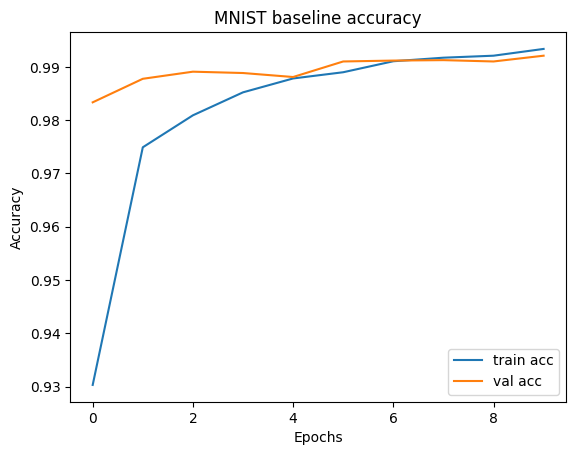

In [19]:
plt.plot(history_mnist.history["accuracy"], label="train acc")
plt.plot(history_mnist.history["val_accuracy"], label="val acc")
plt.title("MNIST baseline accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# ============================================================
# 2. Estensione a Dataset Medico (Chest X-Ray Pneumonia)
# ============================================================

# --- Scaricare dataset da Kaggle ---

In [20]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"hanineji","key":"c922cdad6f868e298b54ffb23d9e6d54"}'}

In [21]:
!pip install kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia
!unzip chest-xray-pneumonia.zip -d data/

Output streaming troncato alle ultime 5000 righe.
  inflating: data/chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: data/chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: data/chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: data/chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: data/chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: data/chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: data/chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: data/chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: data/chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: data/chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: data/chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: data/chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: data/chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: data/chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: data/chest_xray/train/NORMAL/IM-0446-0001.jp

In [23]:
import os

for root, dirs, files in os.walk("data"):
    print(root)
    for d in dirs:
        print("  -", d)


data
  - chest_xray
data/chest_xray
  - __MACOSX
  - val
  - test
  - chest_xray
  - train
data/chest_xray/__MACOSX
  - chest_xray
data/chest_xray/__MACOSX/chest_xray
  - val
  - test
  - train
data/chest_xray/__MACOSX/chest_xray/val
  - PNEUMONIA
  - NORMAL
data/chest_xray/__MACOSX/chest_xray/val/PNEUMONIA
data/chest_xray/__MACOSX/chest_xray/val/NORMAL
data/chest_xray/__MACOSX/chest_xray/test
  - PNEUMONIA
  - NORMAL
data/chest_xray/__MACOSX/chest_xray/test/PNEUMONIA
data/chest_xray/__MACOSX/chest_xray/test/NORMAL
data/chest_xray/__MACOSX/chest_xray/train
  - PNEUMONIA
  - NORMAL
data/chest_xray/__MACOSX/chest_xray/train/PNEUMONIA
data/chest_xray/__MACOSX/chest_xray/train/NORMAL
data/chest_xray/val
  - PNEUMONIA
  - NORMAL
data/chest_xray/val/PNEUMONIA
data/chest_xray/val/NORMAL
data/chest_xray/test
  - PNEUMONIA
  - NORMAL
data/chest_xray/test/PNEUMONIA
data/chest_xray/test/NORMAL
data/chest_xray/chest_xray
  - val
  - test
  - train
data/chest_xray/chest_xray/val
  - PNEUMONIA
  - N

In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_height, img_width = 128, 128
batch_size = 32

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# TRAIN
train_generator = train_datagen.flow_from_directory(
    "data/chest_xray/train",
    target_size=(img_height, img_width),
    color_mode="grayscale",   # usa "rgb" se vuoi immagini a colori
    batch_size=batch_size,
    class_mode="categorical",
    subset="training"
)

# VALIDATION
val_generator = train_datagen.flow_from_directory(
    "data/chest_xray/train",
    target_size=(img_height, img_width),
    color_mode="grayscale",
    batch_size=batch_size,
    class_mode="categorical",
    subset="validation"
)

# TEST (nuovo blocco)
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    "data/chest_xray/test",
    target_size=(img_height, img_width),
    color_mode="grayscale",
    batch_size=batch_size,
    class_mode="categorical"
)


Found 4173 images belonging to 2 classes.
Found 1043 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [25]:
!ls data/chest_xray


chest_xray  __MACOSX  test  train  val


# Definizione CNN per dataset medico

In [26]:
input_shape = (img_height, img_width, 1)  # o (128,128,3) se RGB
num_classes = train_generator.num_classes

medical_model = models.Sequential([
    layers.Conv2D(32, (3,3), activation="relu", input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation="softmax")
])

medical_model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])



In [27]:
test_loss, test_acc = medical_model.evaluate(test_generator)
print("Test accuracy su dataset medico:", test_acc)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 161ms/step - accuracy: 0.4818 - loss: 0.6931
Test accuracy su dataset medico: 0.4967948794364929


# Training

In [28]:
history_medical = medical_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)

Epoch 1/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 39s 264ms/step - accuracy: 0.7996 - loss: 0.4429 - val_accuracy: 0.9482 - val_loss: 0.1605
Epoch 2/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 31s 241ms/step - accuracy: 0.9427 - loss: 0.1421 - val_accuracy: 0.9626 - val_loss: 0.1101
Epoch 3/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 30s 230ms/step - accuracy: 0.9665 - loss: 0.1031 - val_accuracy: 0.9664 - val_loss: 0.1009
Epoch 4/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 31s 233ms/step - accuracy: 0.9710 - loss: 0.0823 - val_accuracy: 0.9588 - val_loss: 0.1156
Epoch 5/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 30s 229ms/step - accuracy: 0.9744 - loss: 0.0730 - val_accuracy: 0.9540 - val_loss: 0.1266
Epoch 6/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 31s 236ms/step - accuracy: 0.9759 - loss: 0.0636 - val_accuracy: 0.9674 - val_loss: 0.0877
Epoch 7/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 30s 230ms/step - accuracy: 0.9826 - loss: 0.0465 - val_accuracy: 0.9578 - val_loss: 0.1247
Epoch 8/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 35s 265ms/step - accuracy: 0.9866 - loss: 0

# Grafico confronto

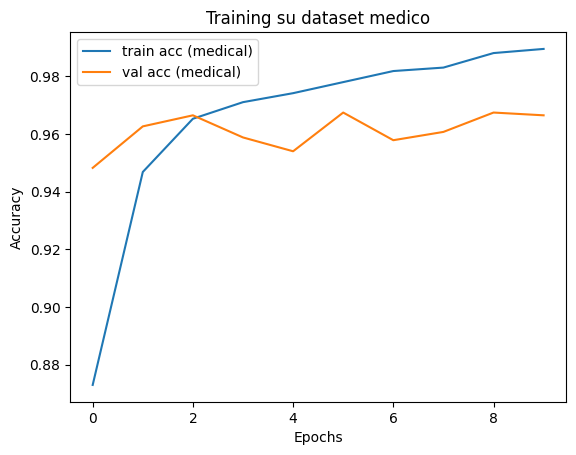

In [29]:
plt.plot(history_medical.history["accuracy"], label="train acc (medical)")
plt.plot(history_medical.history["val_accuracy"], label="val acc (medical)")
plt.title("Training su dataset medico")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()